In [113]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(1, '../src')
from utils.accuracy import *
from utils.dm_test import dm_test


# Data Profile

In [90]:
ind_cat = pd.read_csv("../data/processed/ind_cat.csv", index_col=0)
adress = pd.read_csv("../data/processed/adress.csv", index_col=0)

In [93]:
prof = pd.read_csv("../stata/reg/accuracy_features_i.csv", index_col=0)

In [111]:
ind_cat["東証業種コード"].value_counts()

3650    115
6050    103
3200     97
3600     95
5250     75
2050     71
9050     60
6100     57
3700     49
3050     46
5050     35
3800     31
3450     29
3400     25
3550     25
3100     24
3250     23
8050     21
3750     21
3500     18
5200     13
3150      9
3350      7
5100      7
4050      7
3300      5
50        3
1050      3
5150      2
Name: 東証業種コード, dtype: int64

In [108]:
ind_cat["東証業種名（漢字）"].value_counts()

電気機器        115
卸売業         103
化学           97
機械           95
情報・通信業       75
建設業          71
サービス業        60
小売業          57
輸送用機器        49
食料品          46
陸運業          35
その他製品        31
鉄鋼           29
ガラス・土石製品     25
金属製品         25
繊維製品         24
医薬品          23
不動産業         21
精密機器         21
非鉄金属         18
倉庫・運輸関連業     13
パルプ・紙         9
ゴム製品          7
海運業           7
電気・ガス業        7
石油・石炭製品       5
水産・農林業        3
鉱業            3
空運業           2
Name: 東証業種名（漢字）, dtype: int64

In [109]:
prof["jis_prefec_code_head"].value_counts()

13    540
27    168
23     64
14     59
28     41
26     28
11     20
40     16
34     11
22     11
20     11
15     10
21      9
12      8
10      8
16      7
4       6
17      6
33      5
35      5
18      5
9       5
19      5
7       4
24      4
1       3
37      3
8       2
36      2
25      2
38      2
31      1
30      1
43      1
46      1
45      1
29      1
Name: jis_prefec_code_head, dtype: int64

# Accuracy

In [11]:
at = pd.read_csv("../assets/y_hats/accuracy_table_edited.csv", index_col=0)
at = at.drop(["y_hat_ml1_a10", "y_hat_ml1_a20", "y_hat_ml1_a100", "y_hat_ml1_a1000", "y_hat_ml2_a10"])
at.round(3)

,Max_error,Max_percentage_error,MAE,MAPE,MSPE,MAPE-UB,MSPE-UB,Large_error_rate
y_test,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
y_hat_rw,1989.290,5895.000,38.746,4.314,7001.957,0.584,0.473,12.580
y_hat_sarima_br,17667.440,88978.127,38.468,9.708,606873.643,0.527,0.411,35.587
y_hat_sarima_f,3611.478,2068.167,34.882,2.823,1142.824,0.527,0.413,9.417
y_hat_sarima_g,3370.115,34626.007,39.409,6.123,93472.215,0.534,0.423,20.514
y_hat_umlp,8148.715,134665.300,53.453,14.807,1391902.437,0.603,0.489,46.030
y_hat_ul1_i_tuned,4322.802,21034.826,37.356,4.471,35063.347,0.567,0.443,16.434
y_hat_ul2_i_tuned,6374.325,21034.826,44.110,5.327,35475.469,0.548,0.435,17.266
y_hat_mlm1,33025.110,19193.225,60.126,5.779,29555.807,0.586,0.481,16.115
y_hat_mlm2,40758.245,120789.437,71.752,14.285,1118622.103,0.597,0.494,39.123


In [83]:
ati = pd.read_csv("../assets/y_hats/accuracy_table_i_2.csv", index_col=[0, 1])
ati

y_test   y_hat_rw  y_hat_sarima_br  \
あらた   Max_error                0.0  91.946554        51.766445   
      Max_percentage_error     0.0   1.497417         0.843054   
      MAE                      0.0  30.608046        19.684363   
      MAPE                     0.0   0.326915         0.209451   
      MSPE                     0.0   0.245053         0.093651   
...                            ...        ...              ...   
ｅＢＡＳＥ MAPE                     0.0   2.342302        13.191458   
      MSPE                     0.0  16.899425      1015.709699   
      MAPE-UB                  0.0   0.710243         0.881591   
      MSPE-UB                  0.0   0.566612         0.846380   
      Large_error_rate         NaN   5.896178        17.413156   

                            y_hat_sarima_f  y_hat_sarima_g    y_hat_umlp  \
あらた   Max_error                  43.539003       55.172241     41.094900   
      Max_percentage_error        0.709064        0.898520      0.317921   
      MAE                        19.228381       18.677474     15.651965   
      MAPE                        0.199988        0.202024      0.144319   
      MSPE                        0.077152        0.092755      0.030662   
...                                    ...             ...           ...   
ｅＢＡＳＥ MAPE                        0.813159       65.019947     61.054372   
      MSPE                        1.021084    21112.894395  12751.613599   
      MAPE-UB                     0.645831        1.000000      1.000000   
      MSPE-UB                     0.540480        1.000000      1.000000   
      Large_error_rate            1.501983       65.019947     61.054372   

                            y_hat_men_a10  y_hat_men  \
あらた   Max_error                 45.098971  45.434440   
      Max_percentage_error       0.734470   0.739933   
      MAE                       17.422650  21.434863   
      MAPE                       0.187594   0.226094   
      MSPE                       0.071688   0.087052   
...                                   ...        ...   
ｅＢＡＳＥ MAPE                       0.878083   0.978257   
      MSPE                       1.565783   2.130007   
      MAPE-UB                    0.541973   0.548575   
      MSPE-UB                    0.416116   0.424504   
      Large_error_rate           2.008331   2.289049   

                            y_hat_men_i_tuned_simple  y_hat_ml1_a10  ...  \
あらた   Max_error                            42.141273      42.141273  ...   
      Max_percentage_error                  0.686301       0.686301  ...   
      MAE                                  17.493859      17.493859  ...   
      MAPE                                  0.183884       0.183884  ...   
      MSPE                                  0.063162       0.063162  ...   
...                                              ...            ...  ...   
ｅＢＡＳＥ MAPE                                  0.577657       0.972330  ...   
      MSPE                                  0.641757       2.114298  ...   
      MAPE-UB                               0.460552       0.545191  ...   
      MSPE-UB                               0.325218       0.418660  ...   
      Large_error_rate                      1.702630       2.281416  ...   

                             y_hat_mlm1   y_hat_mlm2   y_hat_mlm3  y_hat_mlm4  \
あらた   Max_error               36.793501    66.587451    64.709385  291.321583   
      Max_percentage_error     0.419341     0.950164     1.053840    4.744385   
      MAE                     20.530130    29.458014    25.433401   94.363606   
      MAPE                     0.200535     0.298360     0.273272    1.057403   
      MSPE                     0.057927     0.157748     0.149275    2.645720   
...                                 ...          ...          ...         ...   
ｅＢＡＳＥ MAPE                    22.918384    44.063759    35.765496    2.762840   
      MSPE                  1008.018984  4515.181024  2959.218843   11.327379   
      M

In [29]:
y_hats_all = pd.read_csv("../assets/y_hats/y_hats_all.csv", index_col=[0, 1, 2])
y_hats_all

y_test    y_hat_rw  y_hat_sarima_br  y_hat_sarima_f  \
企業名   会計年度 四半期                                                            
あらた   2018 Q1   105.420000   69.340000       122.565740      122.449521   
           Q2    90.440000  105.420000        79.897110       79.998967   
           Q3   106.240000   90.440000       119.386680      119.551232   
           Q4    99.220000  106.240000        60.222049       59.996949   
      2019 Q1   116.850000   99.220000       127.203963      125.133255   
...                    ...         ...              ...             ...   
ｅＢＡＳＥ 2019 Q4    18.657982    5.290000        51.406785       36.300485   
      2020 Q1     2.010000   18.657982       -68.232333       -0.020788   
           Q2     3.810000    2.010000        19.227708       11.637899   
           Q3     3.070000    3.810000      -317.707192        3.736002   
           Q4     9.989365    3.070000        34.835646       18.235485   

                y_hat_sarima_g  y_hat_umlp  y_hat_men_a10   y_hat_men  \
企業名   会計年度 四半期                                                          
あらた   2018 Q1       130.595361   111.25781      99.365086  125.764338   
           Q2        94.544504    84.75139      77.040983   80.510256   
           Q3       119.287623   114.48496      92.806642  100.266164   
           Q4        65.424073    79.35591      69.669839   73.680901   
      2019 Q1       126.004465   113.64266     118.407780  108.060538   
...                        ...         ...            ...         ...   
ｅＢＡＳＥ 2019 Q4        88.758959  -138.77140      22.366487   22.396841   
      2020 Q1      -980.636406  -454.12380       8.046577    9.629107   
           Q2      -201.877901 -1139.42900      11.405209   11.307758   
           Q3      -249.404402  -299.76132       8.682325    9.745837   
           Q4        72.472296  -176.82642      13.451815   14.329583   

                y_hat_men_i_tuned_simple  y_hat_ml1_a10  ...  y_hat_mlm1  \
企業名   会計年度 四半期                                           ...               
あらた   2018 Q1                  89.690620      89.690620  ...  142.213501   
           Q2                  76.539459      76.539459  ...   92.463386   
           Q3                  92.859737      92.859737  ...  118.419913   
           Q4                  69.808968      69.808968  ...   72.589673   
      2019 Q1                 117.066485     117.066485  ...   98.036624   
...                                  ...            ...  ...         ...   
ｅＢＡＳＥ 2019 Q4                  23.758595      22.365594  ...  -82.273856   
      2020 Q1                   5.398358       9.619216  ...  161.435880   
           Q2                  10.361336      11.296921  ... -129.129435   
           Q3                   5.640301       9.722418  ...  -55.248900   
           Q4                  12.431659      13.807298  ...    8.203400   

                 y_hat_mlm2  y_hat_mlm3  y_hat_mlm4  y_hat_mmlp  y_hat_mraf  \
企業名   会計年度 四半期                                                                
あらた   2018 Q1    113.490222  117.339606  263.859095   60.607697   82.856600   
           Q2    157.027451  147.870649  186.013135   75.818980   99.204700   
           Q3     84.545219   84.910297  -90.797436   61.267445  102.953600   
           Q4    111.753597   83.042883   43.663635   66.711740   78.410900   
      2019 Q1    126.181789  135.395355  137.056577  108.427100   95.957400   
...                     ...         ...         ...         ...         ...   
ｅＢＡＳＥ 2019 Q4   1361.294861  832.541667   31.609783  -37.442333   22.000242   
      2020 Q1    -96.581389 -108.274805   -8.705827   -7.081633    9.017779   
           Q2    638.576354  562.144933  -12.323521    4.746031   17.455577   
           Q3     47.373257   -3.808247   14.509884 -235.246170    5.576439   
           Q4     55.521833  130.403399    8.147153   34.971806   10.686270   

                y_hat_mraf_i_tuned_simple_  y_hat_msvm  \
企業名   会計年度 四半期     

error distribution

In [115]:
error_p_abs = []
for i in y_hats_all.columns:
    error_p_abs.append(AbsolutePercentageError(y_hats_all["y_test"], y_hats_all[i]))
error_p_abs = pd.DataFrame(error_p_abs).T
error_p_abs.columns = y_hats_all.columns
error_p_abs.describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_men_a10,y_hat_men,y_hat_men_i_tuned_simple,y_hat_ml1_a10,...,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp,y_hat_mraf,y_hat_mraf_i_tuned_simple_,y_hat_msvm,y_hat_ul1_i_tuned_simple,y_hat_ul2_i_tuned_simple
count,13068.0,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,...,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000
mean,0.0,4.313953,9.708306,2.823022,6.123333,14.806769,4.015345,4.868338,1.883392,3.884515,...,5.778863,14.285043,15.209637,31.944189,3.837378,4.102937,4.067308,2.883910,4.471173,5.326721
std,0.0,83.569621,778.990262,33.688884,305.682629,1179.741370,89.136785,92.761017,42.945596,83.343692,...,171.827446,1057.593320,1096.885113,715.645658,56.772584,229.165008,229.176170,87.645257,187.205868,188.281193
min,0.0,0.000000,0.000127,0.000035,0.000039,0.000044,0.000015,0.000004,0.000049,0.000011,...,0.000121,0.000355,0.000041,0.000266,0.000018,0.000034,0.000056,0.000110,0.000024,0.000025
25%,0.0,0.240803,0.186371,0.177526,0.181412,0.265654,0.144887,0.165656,0.132178,0.140276,...,0.224952,0.234663,0.242207,0.641522,0.229096,0.144911,0.143000,0.309415,0.240546,0.203511
50%,0.0,0.567493,0.457172,0.461149,0.464577,0.621202,0.395425,0.487516,0.355726,0.373461,...,0.574726,0.608518,0.639819,1.843934,0.519802,0.351071,0.348762,0.606805,0.546448,0.489669
75%,0.0,1.313804,1.052149,1.085723,1.154855,1.274750,1.097073,1.398529,0.869064,1.075965,...,1.495443,1.622538,1.728114,6.113956,1.227357,0.903244,0.903146,0.974059,1.007293,1.194065
max,0.0,5895.000000,88978.127205,2068.166620,34626.006762,134665.300000,6650.071874,6415.728611,4491.734579,6198.360889,...,19193.225310,120789.437098,125258.155053,50075.354129,3937.530700,26081.830720,26081.830720,9720.600176,21034.826119,21034.826089


[]

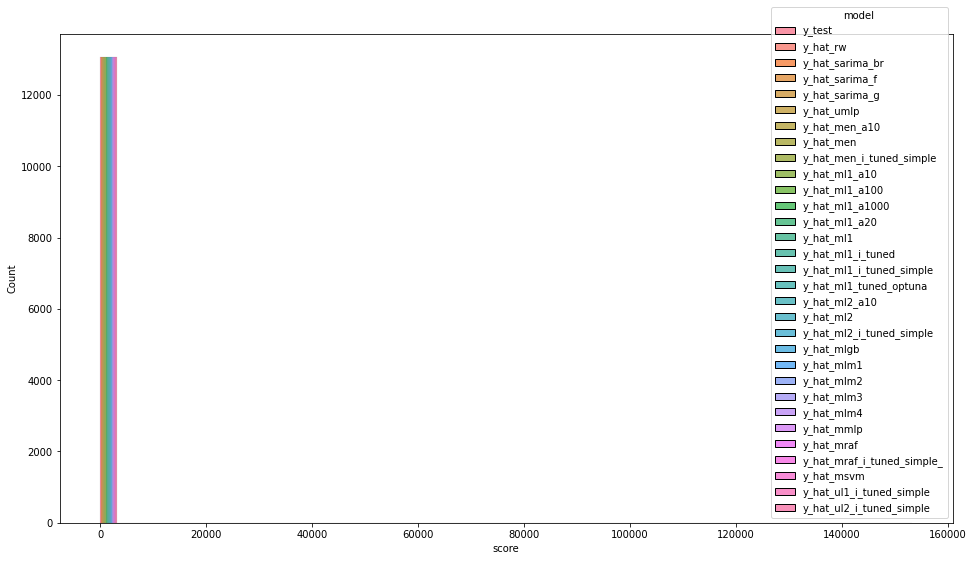

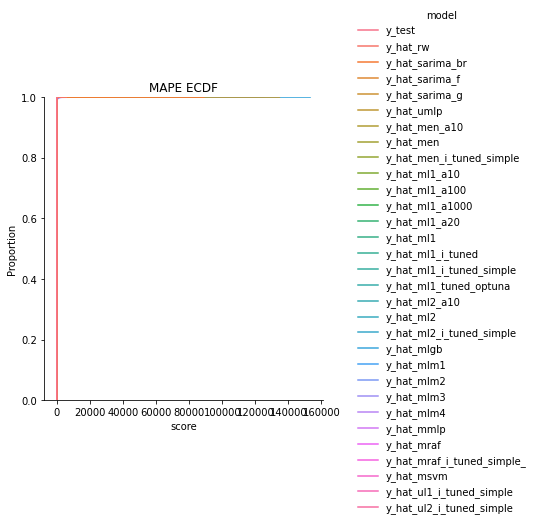

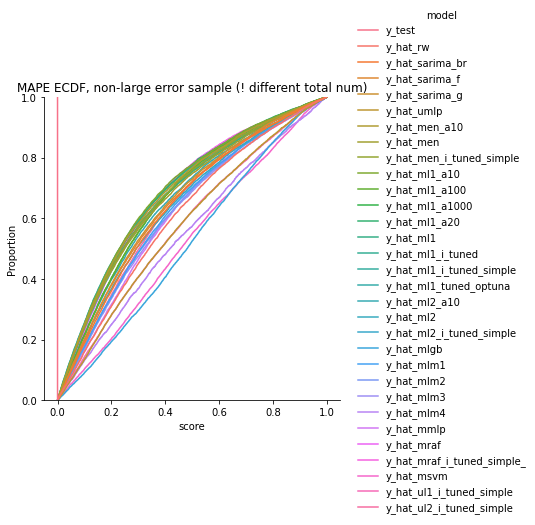

In [120]:
# melt dataframe for plotting
error_melt = error_p_abs.reset_index().melt(id_vars=error_p_abs.index.names, var_name="model", value_name="score")

plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt, x="score", hue="model", bins=50, multiple="dodge")
sns.displot(data=error_melt, x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF")
sns.displot(data=error_melt[error_melt["score"] < 1], x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF, non-large error sample (! different total num)")
plt.plot()

In [116]:
for i in error_p_abs.columns[1:]:
    print(i)
    print((error_p_abs.iloc[:, 1:].idxmin(axis=1) == i).sum(), ((error_p_abs.iloc[:, 1:].idxmin(axis=1) == i).sum()/len(error_p_abs)).round(2))

y_hat_rw
676 0.05
y_hat_sarima_br
476 0.04
y_hat_sarima_f
638 0.05
y_hat_sarima_g
512 0.04
y_hat_umlp
508 0.04
y_hat_men_a10
444 0.03
y_hat_men
412 0.03
y_hat_men_i_tuned_simple
620 0.05
y_hat_ml1_a10
328 0.03
y_hat_ml1_a100
539 0.04
y_hat_ml1_a1000
0 0.0
y_hat_ml1_a20
529 0.04
y_hat_ml1
438 0.03
y_hat_ml1_i_tuned
356 0.03
y_hat_ml1_i_tuned_simple
112 0.01
y_hat_ml1_tuned_optuna
410 0.03
y_hat_ml2_a10
566 0.04
y_hat_ml2
596 0.05
y_hat_ml2_i_tuned_simple
499 0.04
y_hat_mlgb
308 0.02
y_hat_mlm1
496 0.04
y_hat_mlm2
404 0.03
y_hat_mlm3
381 0.03
y_hat_mlm4
335 0.03
y_hat_mmlp
473 0.04
y_hat_mraf
550 0.04
y_hat_mraf_i_tuned_simple_
361 0.03
y_hat_msvm
457 0.03
y_hat_ul1_i_tuned_simple
273 0.02
y_hat_ul2_i_tuned_simple
371 0.03


In [118]:
# UB
error_p_abs_ub = error_p_abs.copy()
error_p_abs_ub[error_p_abs_ub > 1] = 1
error_p_abs_ub.describe()

,y_test,y_hat_rw,y_hat_sarima_br,y_hat_sarima_f,y_hat_sarima_g,y_hat_umlp,y_hat_men_a10,y_hat_men,y_hat_men_i_tuned_simple,y_hat_ml1_a10,...,y_hat_mlm1,y_hat_mlm2,y_hat_mlm3,y_hat_mlm4,y_hat_mmlp,y_hat_mraf,y_hat_mraf_i_tuned_simple_,y_hat_msvm,y_hat_ul1_i_tuned_simple,y_hat_ul2_i_tuned_simple
count,13068.0,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,...,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000
mean,0.0,0.584368,0.526985,0.526749,0.534064,0.603029,0.498185,0.545151,0.463227,0.489744,...,0.585543,0.597033,0.609444,0.805381,0.566839,0.468439,0.467038,0.599225,0.566506,0.548209
std,0.0,0.362200,0.364672,0.367901,0.371721,0.354113,0.377687,0.384221,0.363843,0.377098,...,0.371048,0.371075,0.370876,0.313807,0.362498,0.364010,0.364383,0.330607,0.349055,0.366815
min,0.0,0.000000,0.000127,0.000035,0.000039,0.000044,0.000015,0.000004,0.000049,0.000011,...,0.000121,0.000355,0.000041,0.000266,0.000018,0.000034,0.000056,0.000110,0.000024,0.000025
25%,0.0,0.240803,0.186371,0.177526,0.181412,0.265654,0.144887,0.165656,0.132178,0.140276,...,0.224952,0.234663,0.242207,0.641522,0.229096,0.144911,0.143000,0.309415,0.240546,0.203511
50%,0.0,0.567493,0.457172,0.461149,0.464577,0.621202,0.395425,0.487516,0.355726,0.373461,...,0.574726,0.608518,0.639819,1.000000,0.519802,0.351071,0.348762,0.606805,0.546448,0.489669
75%,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.869064,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.903244,0.903146,0.974059,1.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
for i in error_p_abs_ub.columns[1:]:
    print(i)
    if i == "y_hat_rw":
        print((error_p_abs_ub.iloc[:, 1:].idxmin(axis=1) == i).sum()-len(error_p_abs_ub[(error_p_abs_ub == 1).sum(axis=1) == 10]), (((error_p_abs_ub.iloc[:, 1:].idxmin(axis=1) == i).sum()-len(error_p_abs_ub[(error_p_abs_ub == 1).sum(axis=1) == 10]))/len(error_p_abs)).round(2))
    else:
        print((error_p_abs_ub.iloc[:, 1:].idxmin(axis=1) == i).sum(), ((error_p_abs_ub.iloc[:, 1:].idxmin(axis=1) == i).sum()/len(error_p_abs)).round(2))
print("Large error")
print(len(error_p_abs_ub[(error_p_abs_ub == 1).sum(axis=1) == 10]), (len(error_p_abs_ub[(error_p_abs_ub == 1).sum(axis=1) == 10]) / len(error_p_abs_ub)))

y_hat_rw
777 0.06
y_hat_sarima_br
464 0.04
y_hat_sarima_f
617 0.05
y_hat_sarima_g
506 0.04
y_hat_umlp
478 0.04
y_hat_men_a10
436 0.03
y_hat_men
408 0.03
y_hat_men_i_tuned_simple
597 0.05
y_hat_ml1_a10
326 0.02
y_hat_ml1_a100
532 0.04
y_hat_ml1_a1000
0 0.0
y_hat_ml1_a20
521 0.04
y_hat_ml1
427 0.03
y_hat_ml1_i_tuned
340 0.03
y_hat_ml1_i_tuned_simple
108 0.01
y_hat_ml1_tuned_optuna
398 0.03
y_hat_ml2_a10
551 0.04
y_hat_ml2
573 0.04
y_hat_ml2_i_tuned_simple
484 0.04
y_hat_mlgb
293 0.02
y_hat_mlm1
479 0.04
y_hat_mlm2
389 0.03
y_hat_mlm3
372 0.03
y_hat_mlm4
320 0.02
y_hat_mmlp
457 0.03
y_hat_mraf
539 0.04
y_hat_mraf_i_tuned_simple_
351 0.03
y_hat_msvm
412 0.03
y_hat_ul1_i_tuned_simple
262 0.02
y_hat_ul2_i_tuned_simple
362 0.03
Large error
289 0.022115090296908477


Text(0.5, 1.0, 'MAPE ECDF, non-large error sample (! different total num)')

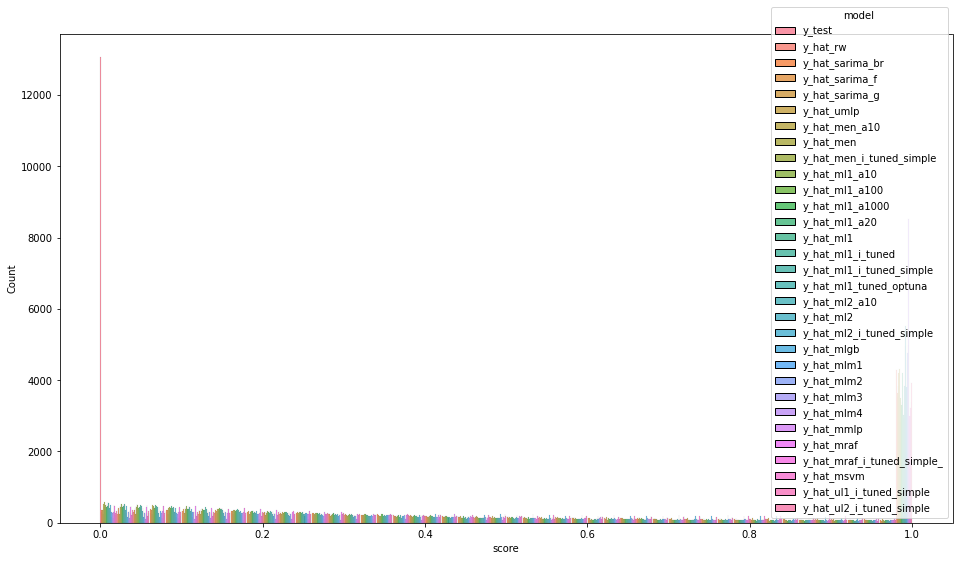

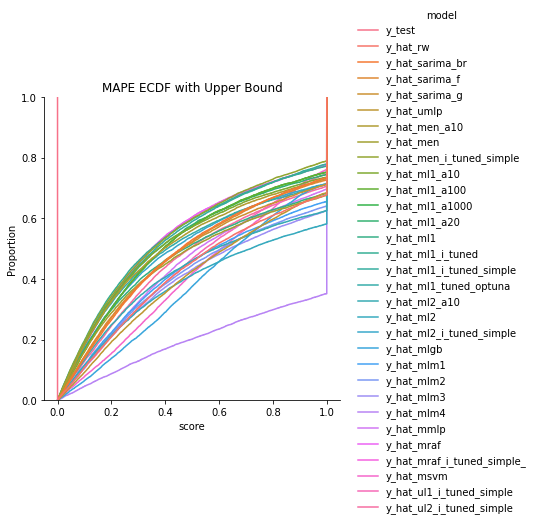

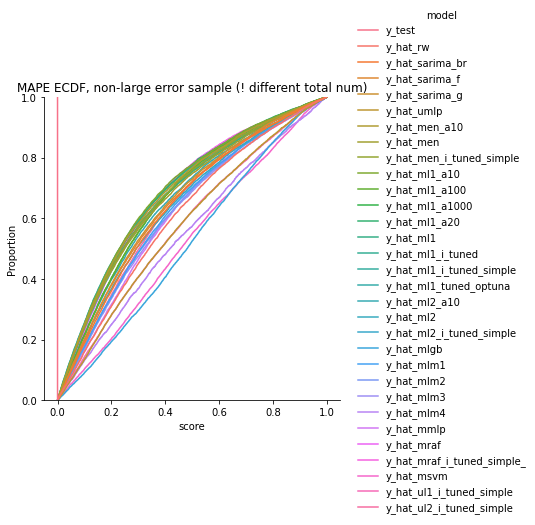

In [121]:
# upper bound
error_melt_ub = error_p_abs_ub.reset_index().melt(id_vars=error_p_abs.index.names, var_name="model", value_name="score")
plt.figure(figsize=(16, 9))
sns.histplot(data=error_melt_ub, x="score", hue="model", bins=50, multiple="dodge")
sns.displot(data=error_melt_ub, x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF with Upper Bound")
sns.displot(data=error_melt_ub[error_melt_ub["score"] < 1], x="score", hue="model", kind="ecdf")
plt.title("MAPE ECDF, non-large error sample (! different total num)")

# DM-test

In [84]:
i = y_hats_all.index.get_level_values(0).unique()[0]
method_1 = y_hats_all.columns[3]
method_2 = y_hats_all.columns[8]

In [85]:
ati.loc[i][[method_1, method_2]]

,y_hat_sarima_f,y_hat_men_i_tuned_simple
Max_error,43.539003,42.141273
Max_percentage_error,0.709064,0.686301
MAE,19.228381,17.493859
MAPE,0.199988,0.183884
MSPE,0.077152,0.063162
MAPE-UB,0.199988,0.183884
MSPE-UB,0.077152,0.063162
Large_error_rate,NaN,NaN


In [87]:
y_hats_all.loc[i][["y_test", method_1, method_2]]

y_test  y_hat_sarima_f  y_hat_men_i_tuned_simple
会計年度 四半期                                                      
2018 Q1   105.420000      122.449521                 89.690620
     Q2    90.440000       79.998967                 76.539459
     Q3   106.240000      119.551232                 92.859737
     Q4    99.220000       59.996949                 69.808968
2019 Q1   116.850000      125.133255                117.066485
     Q2   101.760000       97.882361                111.089610
     Q3   113.930000      113.632806                109.848639
     Q4    79.900000      104.248645                 93.805843
2020 Q1   145.230000      104.395347                136.786423
     Q2   120.680000      119.006341                 94.494641
     Q3   153.350000      125.468316                120.148422
     Q4    61.403446      104.942449                103.544719

In [46]:
# criterion MAPE
print(i, method_1, method_2)
dm_test(y_hats_all["y_test"].loc[i], y_hats_all[method_1].loc[i], y_hats_all[method_2].loc[i], h=1, crit="MAPE")

あらた y_hat_sarima_f y_hat_men_i_tuned_simple


dm_return(DM=0.5195621279954382, p_value=0.6136630108549359)

In [45]:
# criterion MSE
print(i, method_1, method_2)
dm_test(y_hats_all["y_test"].loc[i], y_hats_all[method_1].loc[i], y_hats_all[method_2].loc[i], h=1, crit="MSE")

あらた y_hat_sarima_f y_hat_men_i_tuned_simple


dm_return(DM=0.87644094924647, p_value=0.3995258979906189)

In [77]:
# MAPE dm-test using existing package
def dm(y_hats, method1, method2, crit="MAPE"):
    firm_list = y_hats.index.get_level_values(0).unique()
    firm_list = list(firm_list)

    def dm_test_i(firm, crit=crit):
        firm_slice = y_hats.loc[pd.IndexSlice[firm, :, :], :]
        return dm_test(firm_slice["y_test"], firm_slice[method1], firm_slice[method2], h=1, crit=crit)

    dm_results = list(map(dm_test_i, firm_list))

    dm = pd.DataFrame(dm_results, index=firm_list)

    ac_i = pd.read_csv("../assets/y_hats/accuracy_table_i_2.csv", index_col=[0, 1])
    crit_i = ac_i.loc[pd.IndexSlice[:, crit], [method1, method2]]
    crit_i.index = firm_list
    dm = pd.concat([dm, crit_i], axis=1)
    return dm

# check

In [78]:
dm_mape = dm(y_hats_all, method_1, method_2, crit="MAPE")
dm_mape

,DM,p_value,y_hat_sarima_f,y_hat_men_i_tuned_simple
あらた,0.519562,0.613663,0.199988,0.183884
いすゞ自動車,1.054736,0.314162,0.596406,0.386257
いなげや,0.588156,0.568307,1.239337,1.045793
かどや製油,-0.736068,0.477093,0.585215,0.726010
きんでん,1.636030,0.130097,0.132039,0.063474
...,...,...,...,...
ＶＴホールディングス,1.789498,0.101070,0.952420,0.567839
ＷＤＢホールディングス,0.044850,0.965031,0.242735,0.240448
ＷＯＷＯＷ,-1.923427,0.080682,0.509329,3.113858
ＺＯＺＯ,-0.967761,0.353960,0.431233,0.612887


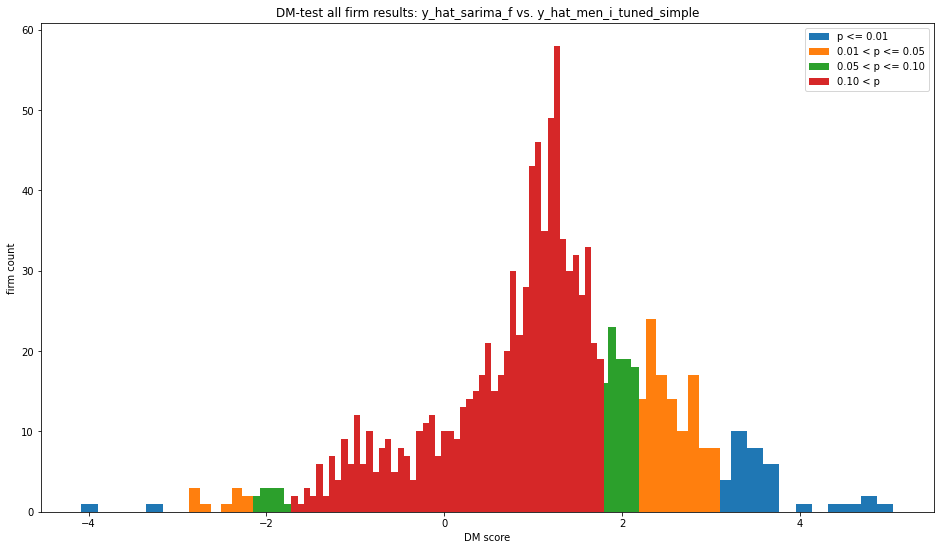

2 10 12 159 | 665 95 112 34


In [79]:
plt.figure(figsize=(16, 9))
plt.hist(x = dm_mape[(dm_mape["p_value"] <= 0.01)]["DM"], bins=50, label="p <= 0.01")
plt.hist(x = dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"], bins=50, label="0.01 < p <= 0.05")
plt.hist(x = dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"], bins=50, label="0.05 < p <= 0.10")
plt.hist(x = dm_mape[dm_mape["p_value"] > 0.10]["DM"], bins=50, label="0.10 < p")
plt.xlabel("DM score")
plt.ylabel("firm count")
plt.legend()
plt.title("DM-test all firm results: " + method_1 + " vs. " + method_2)
plt.show()

p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
p1_5n = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] < 0).sum()
p5_10n = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] < 0).sum()
p10_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
p10_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
p5_10p = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] > 0).sum()
p1_5p = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] > 0).sum()
p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
print(p_1n, p1_5n, p5_10n, p10_n, "|", p10_p, p5_10p, p1_5p, p_1p)

両側検定。DM検定量 > 0 なら、method_1のMAPEがmethod_2のMAPEよりも有意に大きい(精度が低い)かどうか

/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: divide by zero encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d
/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: invalid value encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d


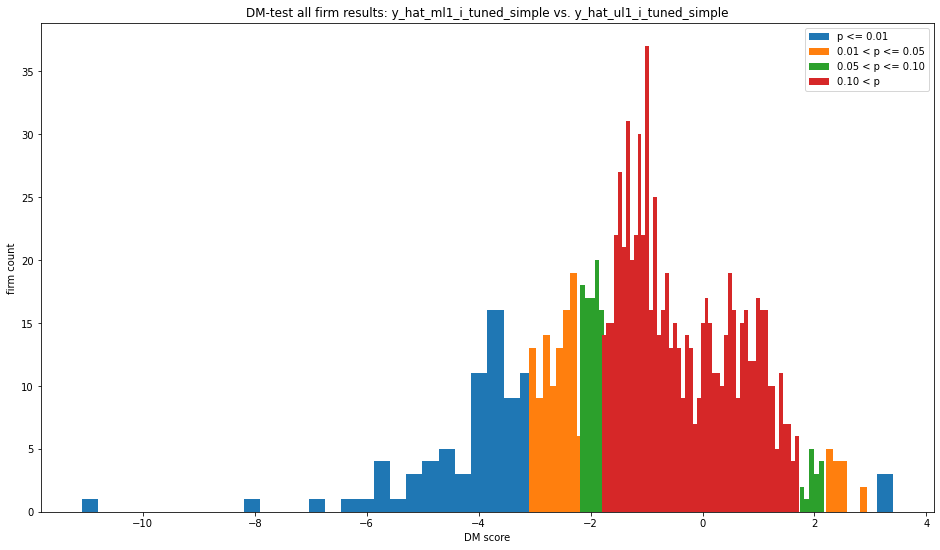

72 100 88 463 | 297 15 15 3


In [81]:
method_1 = "y_hat_ml1_i_tuned_simple"
method_2 = "y_hat_ul1_i_tuned_simple"
dm_mape = dm(y_hats_all, method_1, method_2, crit="MAPE")

plt.figure(figsize=(16, 9))
plt.hist(x = dm_mape[(dm_mape["p_value"] <= 0.01)]["DM"], bins=50, label="p <= 0.01")
plt.hist(x = dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"], bins=50, label="0.01 < p <= 0.05")
plt.hist(x = dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"], bins=50, label="0.05 < p <= 0.10")
plt.hist(x = dm_mape[dm_mape["p_value"] > 0.10]["DM"], bins=50, label="0.10 < p")
plt.xlabel("DM score")
plt.ylabel("firm count")
plt.legend()
plt.title("DM-test all firm results: " + method_1 + " vs. " + method_2)
plt.show()

p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
p1_5n = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] < 0).sum()
p5_10n = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] < 0).sum()
p10_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
p10_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
p5_10p = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] > 0).sum()
p1_5p = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] > 0).sum()
p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
print(p_1n, p1_5n, p5_10n, p10_n, "|", p10_p, p5_10p, p1_5p, p_1p)

In [ ]:
# プラシーボテスト
# 同じような精度の手法同士なら0中心に左右対称になるか?